In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(data.shape)
data.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [7]:
data.drop(['Name','Ticket'], axis=1, inplace=True)

In [8]:
data["CabinDeck"] = data["Cabin"].astype(str).str[0]
data["CabinDeck"] = data["CabinDeck"].replace("n", "U")

In [9]:
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_56996\1414317196.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_56996\1414317196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [10]:
data['Age'] = data['Age'].astype(int)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinDeck
1,2,1,1,female,38,1,0,71.2833,C85,C,C
3,4,1,1,female,35,1,0,53.1000,C123,S,C
6,7,0,1,male,54,0,0,51.8625,E46,S,E
10,11,1,3,female,4,1,1,16.7000,G6,S,G
11,12,1,1,female,58,0,0,26.5500,C103,S,C


In [12]:
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

In [13]:
data.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinDeck,FamilySize
1,2,1,1,female,38,1,0,71.2833,C85,C,C,2
3,4,1,1,female,35,1,0,53.1000,C123,S,C,2
6,7,0,1,male,54,0,0,51.8625,E46,S,E,1
10,11,1,3,female,4,1,1,16.7000,G6,S,G,3
11,12,1,1,female,58,0,0,26.5500,C103,S,C,1
21,22,1,2,male,34,0,0,13.0000,D56,S,D,1
23,24,1,1,male,28,0,0,35.5000,A6,S,A,1
27,28,0,1,male,19,3,2,263.0000,C23 C25 C27,S,C,6
52,53,1,1,female,49,1,0,76.7292,D33,C,D,2
54,55,0,1,male,65,0,1,61.9792,B30,C,B,2


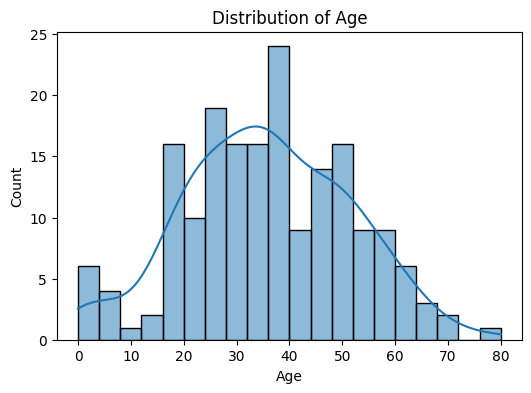

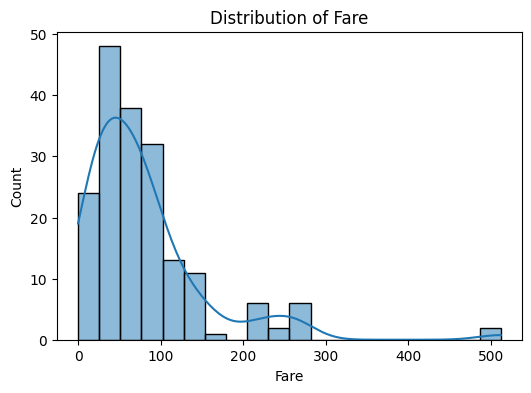

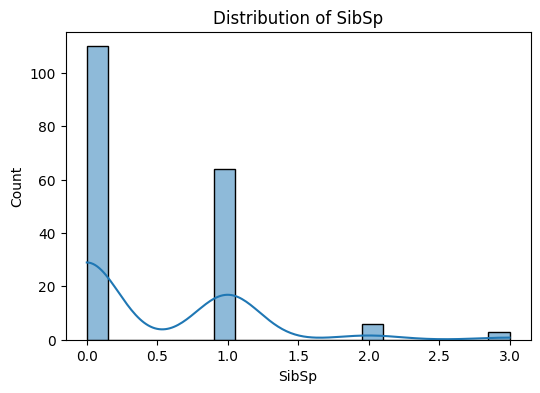

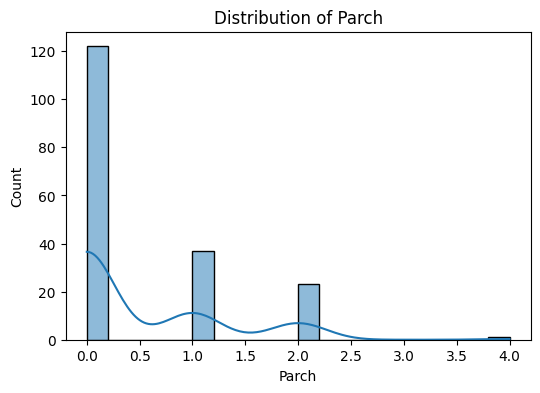

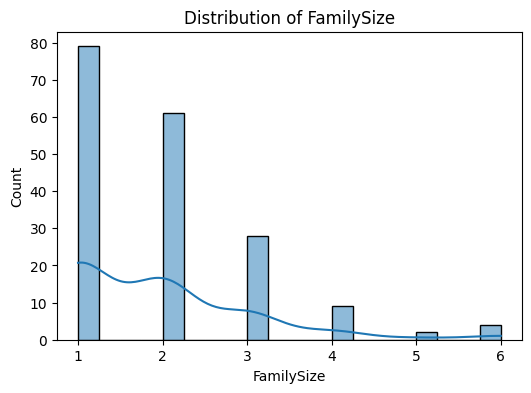

In [ ]:

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "CabinDeck", "FamilySize"]

X = data[features]
y_classregression = data["Survived"]
X = data[features]
y_classregression = data["Survived"]

nfeatures = ["Age", "Fare", "SibSp", "Parch", "FamilySize"]
cfeatures = ["Sex", "Embarked", "CabinDeck"]

for col in nfeatures:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

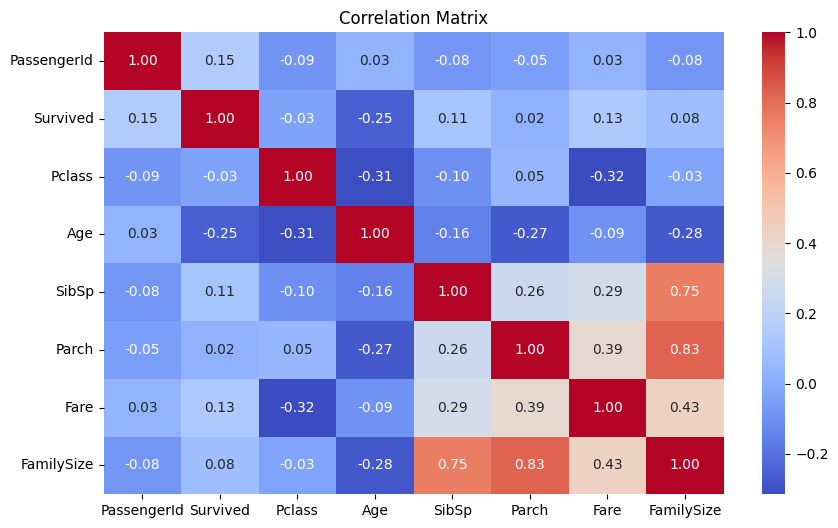

In [15]:
plt.figure(figsize=(10, 6))
numeric = data.select_dtypes(include=[np.number])
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

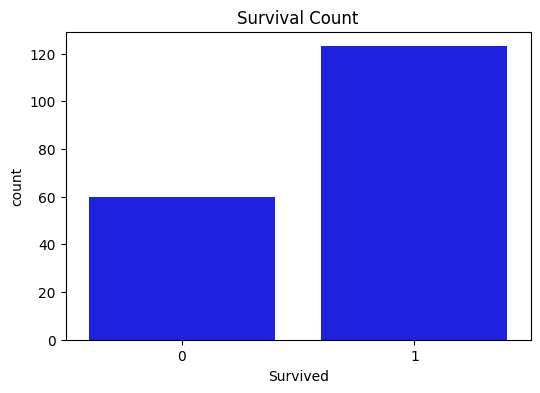

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data,color = 'blue')
plt.title('Survival Count') 
plt.show()

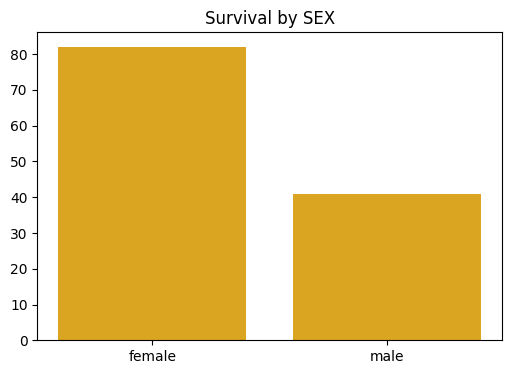

In [17]:
plt.figure(figsize=(6, 4))
survivedbysex = data.groupby('Sex')['Survived'].sum()
plt.bar(survivedbysex.index, survivedbysex.values, color='goldenrod')
plt.title('Survival by SEX')
plt.show()

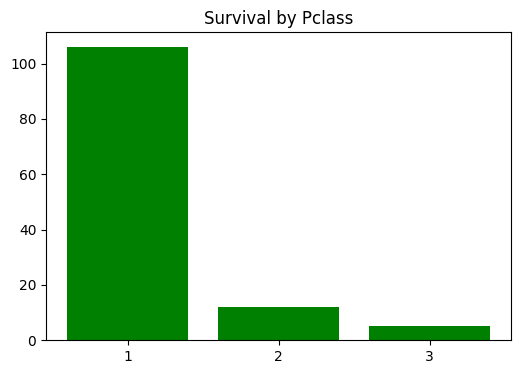

In [18]:
plt.figure(figsize=(6, 4))
survivedbyclass = data.groupby('Pclass')['Survived'].sum()
plt.bar(survivedbyclass.index, survivedbyclass.values, color='green')  
plt.title('Survival by Pclass')
plt.xticks([1, 2, 3])   
plt.show()

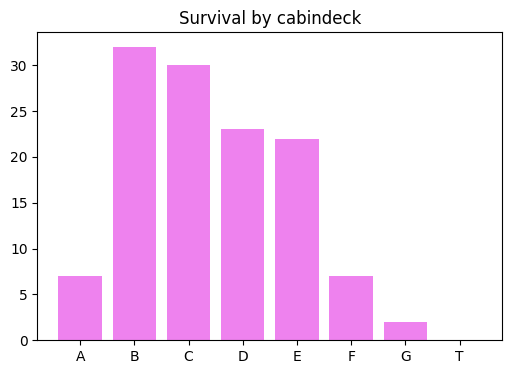

In [19]:
plt.figure(figsize=(6, 4))
survivedbycabindeck = data.groupby('CabinDeck')['Survived'].sum()
plt.bar(survivedbycabindeck.index, survivedbycabindeck.values, color='violet')  
plt.title('Survival by cabindeck') 
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "CabinDeck", "FamilySize"]

X = data[features]
y_classregression = data["Survived"]

nfeatures = ["Age", "Fare", "SibSp", "Parch", "FamilySize"]
cfeatures = ["Sex", "Embarked", "CabinDeck"]



In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), nfeatures), 
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cfeatures)
    ]
)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_classregression, test_size=0.2, random_state=42)

In [23]:
cpipeline = Pipeline([
    ("preprocess", preprocessor),
    ("svm", SVC(kernel="rbf", C=1, gamma="scale"))
])

In [24]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinDeck,FamilySize
1,2,1,1,female,38,1,0,71.2833,C85,C,C,2
3,4,1,1,female,35,1,0,53.1000,C123,S,C,2
6,7,0,1,male,54,0,0,51.8625,E46,S,E,1
10,11,1,3,female,4,1,1,16.7000,G6,S,G,3
11,12,1,1,female,58,0,0,26.5500,C103,S,C,1


In [25]:
cpipeline.fit(X_train, y_train)
ypredclass = cpipeline.predict(X_test)
print("SVM Classification Accuracy:", accuracy_score(y_test, ypredclass))

a = pd.DataFrame([{
	"Pclass": 1,
	"Sex": "male",
	"Age": 54,
	"SibSp": 1,
	"Parch": 0,
	"Fare": 51.8625,
	"Embarked": "S",
	"CabinDeck": "E",
	"FamilySize": 1
}])

print(cpipeline.predict(a))

SVM Classification Accuracy: 0.7567567567567568
[0]


c:\linear_regression\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [26]:
import pickle

In [30]:
modeel = pickle.dump(preprocessor, open("svm_classification_modeel.pkl", "wb"))
model = pickle.dump(cpipeline, open("svm_classification_model.pkl", "wb"))

In [28]:
with open("userdata.pkl", "wb") as file:
    pickle.dump(a, file)

In [29]:
with open("userdata.pkl", "rb") as file:
    loaded_df = pickle.load(file)